Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


load Data

In [2]:
data=pd.read_csv("synthetic_property_rent_data.csv")

Display all Columns

In [3]:
data.columns

Index(['Property_ID', 'Size_sqft', 'Bedrooms', 'Bathrooms', 'Property_Type',
       'Age_Years', 'Renovation_Year', 'Latitude', 'Longitude',
       'Neighborhood_Safety_Index', 'Proximity_to_Public_Transport_km',
       'Walkability_Score', 'Zoning', 'Median_Income_Area',
       'Unemployment_Rate', 'School_District_Rating', 'Crime_Rate_per_Capita',
       'Current_Rent_Price', 'Rent_2020-01', 'Rent_2020-02', 'Rent_2020-03',
       'Rent_2020-04', 'Rent_2020-05', 'Rent_2020-06', 'Rent_2020-07',
       'Rent_2020-08', 'Rent_2020-09', 'Rent_2020-10', 'Rent_2020-11',
       'Rent_2020-12', 'Rent_2021-01', 'Rent_2021-02', 'Rent_2021-03',
       'Rent_2021-04', 'Rent_2021-05', 'Rent_2021-06', 'Rent_2021-07',
       'Rent_2021-08', 'Rent_2021-09', 'Rent_2021-10', 'Rent_2021-11',
       'Rent_2021-12', 'Rent_2022-01', 'Rent_2022-02', 'Rent_2022-03',
       'Rent_2022-04', 'Rent_2022-05', 'Rent_2022-06', 'Rent_2022-07',
       'Rent_2022-08', 'Rent_2022-09', 'Rent_2022-10', 'Rent_2022-11',
   

Data Exploration

In [4]:
#show statastical Analysis
data.describe()

,Size_sqft,Bedrooms,Bathrooms,Age_Years,Renovation_Year,Latitude,Longitude,Neighborhood_Safety_Index,Proximity_to_Public_Transport_km,Walkability_Score,...,Rent_2024-03,Rent_2024-04,Rent_2024-05,Rent_2024-06,Rent_2024-07,Rent_2024-08,Rent_2024-09,Rent_2024-10,Rent_2024-11,Rent_2024-12
count,9000.000000,10000.000000,10000.000000,10000.000000,7700.000000,10000.000000,10000.000000,9000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1200.557667,2.925100,1.794350,49.812200,2011.515195,37.499583,-121.499457,5.476000,1.012579,5.491900,...,1499.475353,1499.019362,1499.113609,1498.785044,1499.452146,1497.948072,1498.649948,1498.273404,1496.747550,1499.424795
std,395.677388,1.144474,0.595373,28.849582,6.939454,0.286002,0.291341,2.883962,0.487904,2.875371,...,508.647096,508.439398,508.295065,507.423732,506.705385,506.508915,507.775479,507.911881,506.181648,508.049910
min,300.000000,1.000000,1.000000,0.000000,2000.000000,37.000130,-121.999871,1.000000,0.100000,1.000000,...,429.345624,420.181893,431.484208,410.881901,424.195157,438.471862,413.021581,424.410254,428.832066,419.482203
25%,930.000000,2.000000,1.500000,25.000000,2005.000000,37.251472,-121.755883,3.000000,0.675061,3.000000,...,1137.994648,1140.255295,1137.056838,1138.005750,1142.231787,1139.621298,1144.003178,1135.587738,1139.756498,1139.568279
50%,1198.000000,3.000000,1.500000,50.000000,2012.000000,37.501292,-121.496968,5.000000,1.005916,5.000000,...,1480.354394,1480.995583,1484.677908,1480.648187,1488.137930,1483.844577,1479.778222,1483.916707,1483.858437,1482.405651
75%,1467.250000,4.000000,2.000000,75.000000,2017.000000,37.748579,-121.243959,8.000000,1.340684,8.000000,...,1843.016056,1846.427977,1836.784323,1844.313179,1842.475864,1845.421772,1843.580793,1844.559961,1842.879675,1842.323679
max,2770.000000,5.000000,3.000000,99.000000,2023.000000,37.999875,-121.000008,10.000000,2.914891,10.000000,...,3414.330293,3692.151428,3542.989412,3551.171894,3620.033091,3428.834274,3400.608818,3492.031321,3405.666306,3457.560006


In [5]:
#check null value and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Property_ID                       10000 non-null  object 
 1   Size_sqft                         9000 non-null   float64
 2   Bedrooms                          10000 non-null  int64  
 3   Bathrooms                         10000 non-null  float64
 4   Property_Type                     9494 non-null   object 
 5   Age_Years                         10000 non-null  int64  
 6   Renovation_Year                   7700 non-null   float64
 7   Latitude                          10000 non-null  float64
 8   Longitude                         10000 non-null  float64
 9   Neighborhood_Safety_Index         9000 non-null   float64
 10  Proximity_to_Public_Transport_km  10000 non-null  float64
 11  Walkability_Score                 10000 non-null  int64  
 12  Zonin

Cleaning Data

In [6]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

Property_ID      0
Size_sqft        0
Bedrooms         0
Bathrooms        0
Property_Type    0
                ..
Rent_2024-08     0
Rent_2024-09     0
Rent_2024-10     0
Rent_2024-11     0
Rent_2024-12     0
Length: 78, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4517 entries, 2 to 9998
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Property_ID                       4517 non-null   object 
 1   Size_sqft                         4517 non-null   float64
 2   Bedrooms                          4517 non-null   int64  
 3   Bathrooms                         4517 non-null   float64
 4   Property_Type                     4517 non-null   object 
 5   Age_Years                         4517 non-null   int64  
 6   Renovation_Year                   4517 non-null   float64
 7   Latitude                          4517 non-null   float64
 8   Longitude                         4517 non-null   float64
 9   Neighborhood_Safety_Index         4517 non-null   float64
 10  Proximity_to_Public_Transport_km  4517 non-null   float64
 11  Walkability_Score                 4517 non-null   int64  
 12  Zoning     

In [9]:
#Indexing
df=pd.DataFrame(data)
df=df.set_index(pd.Index(range(1,len(data) +1)))

In [10]:
df

,Property_ID,Size_sqft,Bedrooms,Bathrooms,Property_Type,Age_Years,Renovation_Year,Latitude,Longitude,Neighborhood_Safety_Index,...,Rent_2024-03,Rent_2024-04,Rent_2024-05,Rent_2024-06,Rent_2024-07,Rent_2024-08,Rent_2024-09,Rent_2024-10,Rent_2024-11,Rent_2024-12
1,P00002,1459.0,1,3.0,Condo,8,2019.0,37.819350,-121.590806,8.0,...,1691.588006,1672.534274,1608.910928,1648.704562,1705.890199,1656.688821,1674.532665,1711.332741,1618.949016,1627.899270
2,P00004,1106.0,3,1.5,Apartment,53,2014.0,37.453855,-121.328897,10.0,...,1138.189487,1119.309015,1199.618312,1134.808241,1051.040287,1144.906422,1148.674264,1099.061952,1142.875859,1235.624732
3,P00005,1106.0,1,2.0,Condo,46,2006.0,37.710473,-121.241501,10.0,...,2381.613636,2412.099282,2473.190265,2417.987926,2246.108844,2495.762023,2548.864713,2469.821643,2413.257637,2271.350281
4,P00006,1831.0,2,1.5,Apartment,40,2002.0,37.344811,-121.652697,4.0,...,904.752897,1009.562963,976.980227,947.262169,1052.413605,971.789917,911.007534,954.545730,932.344171,938.233368
5,P00010,1014.0,4,2.0,Townhouse,26,2015.0,37.183826,-121.223268,10.0,...,1037.888114,1012.401460,1040.316180,987.794873,897.813041,1069.672513,933.147954,926.944694,915.666044,957.468523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,P09993,600.0,3,1.5,Condo,85,2000.0,37.560537,-121.248034,6.0,...,1686.274708,1845.676040,1810.696973,1879.960675,1850.747708,1889.379935,1924.477688,1916.856987,1913.776659,1798.535099
4514,P09994,1677.0,4,1.5,Apartment,36,2007.0,37.367281,-121.345287,1.0,...,1715.272926,1686.732057,1658.009486,1672.661938,1768.178921,1544.613636,1725.213181,1718.199012,1722.799818,1766.022456
4515,P09996,400.0,4,2.0,Townhouse,21,2017.0,37.229630,-121.991156,10.0,...,2072.251704,2062.416460,1943.797455,1881.768125,1804.130819,2133.505868,1913.616753,2002.537076,1916.005450,2105.537740
4516,P09997,917.0,2,2.0,Apartment,96,2004.0,37.024765,-121.730323,8.0,...,1221.380259,1137.833826,1194.133673,1288.009527,1097.762579,1279.817103,1064.832112,1241.640428,1215.860963,1207.705685


EXploratory Data Analysis(EDA)

Numerical Data/Quantitative variables

In [11]:
ALL_Numerical_value=df[["Size_sqft","Bedrooms","Bathrooms","Age_Years","Renovation_Year","Latitude","Longitude","Neighborhood_Safety_Index","Proximity_to_Public_Transport_km","Walkability_Score","Median_Income_Area","Unemployment_Rate","School_District_Rating","Crime_Rate_per_Capita","Current_Rent_Price","Rent_2020-01", "Rent_2020-02","Rent_2020-03","Rent_2020-04","Rent_2020-05","Rent_2020-06","Rent_2020-07","Rent_2020-08","Rent_2020-09","Rent_2020-10","Rent_2020-11","Rent_2020-12","Rent_2021-01","Rent_2021-02","Rent_2021-03","Rent_2021-04","Rent_2021-05","Rent_2021-06","Rent_2021-07","Rent_2021-08","Rent_2021-09","Rent_2021-10","Rent_2021-11","Rent_2021-12","Rent_2022-01","Rent_2022-02","Rent_2022-03","Rent_2022-04","Rent_2022-05","Rent_2022-06","Rent_2022-07","Rent_2022-08","Rent_2022-09","Rent_2022-10","Rent_2022-11","Rent_2022-12","Rent_2023-01","Rent_2023-02","Rent_2023-03","Rent_2023-04","Rent_2023-05","Rent_2023-06","Rent_2023-07","Rent_2023-08","Rent_2023-09","Rent_2023-10","Rent_2023-11","Rent_2023-12","Rent_2024-01","Rent_2024-02","Rent_2024-03","Rent_2024-04","Rent_2024-05","Rent_2024-06","Rent_2024-07","Rent_2024-08","Rent_2024-09","Rent_2024-10","Rent_2024-11","Rent_2024-12"]]

Correlation

In [12]:
ALL_Numerical_value.corr()

,Size_sqft,Bedrooms,Bathrooms,Age_Years,Renovation_Year,Latitude,Longitude,Neighborhood_Safety_Index,Proximity_to_Public_Transport_km,Walkability_Score,...,Rent_2024-03,Rent_2024-04,Rent_2024-05,Rent_2024-06,Rent_2024-07,Rent_2024-08,Rent_2024-09,Rent_2024-10,Rent_2024-11,Rent_2024-12
Size_sqft,1.000000,0.006227,-0.013363,0.019328,-0.012480,0.007178,0.016532,-0.008287,0.005229,0.016654,...,-0.014840,-0.014054,-0.014819,-0.013815,-0.019157,-0.016471,-0.015706,-0.014627,-0.013128,-0.017801
Bedrooms,0.006227,1.000000,0.021071,0.035191,-0.005766,0.007797,0.006767,-0.003243,0.007236,-0.011202,...,-0.022847,-0.023103,-0.020207,-0.029801,-0.023574,-0.027366,-0.025606,-0.027248,-0.026190,-0.027395
Bathrooms,-0.013363,0.021071,1.000000,-0.007609,-0.004282,-0.011837,0.011292,0.003361,0.008454,0.007776,...,0.029301,0.025589,0.029334,0.025898,0.023162,0.029521,0.023174,0.026788,0.023638,0.024188
Age_Years,0.019328,0.035191,-0.007609,1.000000,-0.022780,-0.007695,0.011301,0.008591,0.013173,-0.003559,...,-0.015631,-0.015443,-0.014525,-0.014339,-0.013989,-0.015588,-0.018297,-0.010539,-0.011969,-0.014455
Renovation_Year,-0.012480,-0.005766,-0.004282,-0.022780,1.000000,0.007157,0.005274,0.021875,-0.013343,0.004259,...,-0.035396,-0.035417,-0.034943,-0.028173,-0.035627,-0.035130,-0.032967,-0.036143,-0.032432,-0.036487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rent_2024-08,-0.016471,-0.027366,0.029521,-0.015588,-0.035130,-0.021970,0.001497,0.034628,-0.006165,-0.000159,...,0.976094,0.975284,0.974457,0.974526,0.976044,1.000000,0.977448,0.975087,0.975807,0.975551
Rent_2024-09,-0.015706,-0.025606,0.023174,-0.018297,-0.032967,-0.018510,0.003696,0.030349,-0.008817,-0.005881,...,0.977349,0.977418,0.976606,0.976442,0.976988,0.977448,1.000000,0.977571,0.976925,0.977453
Rent_2024-10,-0.014627,-0.027248,0.026788,-0.010539,-0.036143,-0.019120,0.002115,0.029337,-0.008589,-0.005946,...,0.976441,0.976716,0.976331,0.976228,0.975802,0.975087,0.977571,1.000000,0.975769,0.977004
Rent_2024-11,-0.013128,-0.026190,0.023638,-0.011969,-0.032432,-0.018695,-0.000247,0.031613,-0.004306,-0.006568,...,0.976522,0.975807,0.975924,0.975449,0.976613,0.975807,0.976925,0.975769,1.000000,0.976435


Accuracy is 97%

In [13]:
Numerical_value=df[["Size_sqft","Bedrooms","Bathrooms","Age_Years","Renovation_Year","Latitude","Longitude","Neighborhood_Safety_Index","Proximity_to_Public_Transport_km","Walkability_Score","Median_Income_Area","Unemployment_Rate","School_District_Rating","Crime_Rate_per_Capita","Current_Rent_Price"]]

Yearwise Rent Data

In [14]:
year_2020_rent=df[["Rent_2020-01", "Rent_2020-02","Rent_2020-03","Rent_2020-04","Rent_2020-05","Rent_2020-06","Rent_2020-07","Rent_2020-08","Rent_2020-09","Rent_2020-10","Rent_2020-11","Rent_2020-12"]]
year_2021_rent=df[["Rent_2021-01","Rent_2021-02","Rent_2021-03","Rent_2021-04","Rent_2021-05","Rent_2021-06","Rent_2021-07","Rent_2021-08","Rent_2021-09","Rent_2021-10","Rent_2021-11","Rent_2021-12"]]
year_2022_rent=df[["Rent_2022-01","Rent_2022-02","Rent_2022-03","Rent_2022-04","Rent_2022-05","Rent_2022-06","Rent_2022-07","Rent_2022-08","Rent_2022-09","Rent_2022-10","Rent_2022-11","Rent_2022-12"]]
year_2023_rent=df[["Rent_2023-01","Rent_2023-02","Rent_2023-03","Rent_2023-04","Rent_2023-05","Rent_2023-06","Rent_2023-07","Rent_2023-08","Rent_2023-09","Rent_2023-10","Rent_2023-11","Rent_2023-12"]]
year_2024_rent=df[["Rent_2024-01","Rent_2024-02","Rent_2024-03","Rent_2024-04","Rent_2024-05","Rent_2024-06","Rent_2024-07","Rent_2024-08","Rent_2024-09","Rent_2024-10","Rent_2024-11","Rent_2024-12"]]

Categorical Variables

In [15]:
Categorical_data=df[["Property_Type","Zoning"]]
Categorical_data

,Property_Type,Zoning
1,Condo,Residential
2,Apartment,Residential
3,Condo,Commercial
4,Apartment,Mixed-use
5,Townhouse,Residential
...,...,...
4513,Condo,Residential
4514,Apartment,Residential
4515,Townhouse,Residential
4516,Apartment,Mixed-use


Central Tendency& Central Dispersion

In [16]:
Numerical_value.mode().iloc[0]


Size_sqft                            300.00000
Bedrooms                               3.00000
Bathrooms                              1.50000
Age_Years                             95.00000
Renovation_Year                     2014.00000
Latitude                              37.00013
Longitude                           -121.99982
Neighborhood_Safety_Index              3.00000
Proximity_to_Public_Transport_km       0.10000
Walkability_Score                      4.00000
Median_Income_Area                    20.00000
Unemployment_Rate                      1.00000
School_District_Rating                 1.00000
Crime_Rate_per_Capita                  0.00000
Current_Rent_Price                   500.00000
Name: 0, dtype: float64

In [17]:
Mean_values=Numerical_value.mean()
Median_values=Numerical_value.median()
Mode_values=Numerical_value.mode().iloc[0]
range=Numerical_value.max()-Numerical_value.min()
variance=Numerical_value.var()
Std=Numerical_value.std()

pd.DataFrame({"Mean":Mean_values,"Median":Median_values,"Mode":Mode_values,"Range":range,"Varience":variance,"StandDeviation":Std})

,Mean,Median,Mode,Range,Varience,StandDeviation
Size_sqft,1189.971220,1187.000000,300.00000,2470.000000,156800.811395,395.980822
Bedrooms,2.918087,3.000000,3.00000,4.000000,1.320570,1.149160
Bathrooms,1.796325,1.500000,1.50000,2.000000,0.354876,0.595715
Age_Years,49.337392,49.000000,95.00000,99.000000,835.201022,28.899845
Renovation_Year,2011.543281,2012.000000,2014.00000,23.000000,47.852256,6.917533
Latitude,37.497766,37.497286,37.00013,0.999745,0.082163,0.286641
Longitude,-121.502434,-121.502084,-121.99982,0.999616,0.083972,0.289779
Neighborhood_Safety_Index,5.471773,5.000000,3.00000,9.000000,8.287788,2.878852
Proximity_to_Public_Transport_km,1.004379,1.000698,0.10000,2.814891,0.237815,0.487663
Walkability_Score,5.478636,5.000000,4.00000,9.000000,8.046764,2.836682


Percentile

In [18]:
Numerical_value.quantile([0.25,0.55,0.75])

,Size_sqft,Bedrooms,Bathrooms,Age_Years,Renovation_Year,Latitude,Longitude,Neighborhood_Safety_Index,Proximity_to_Public_Transport_km,Walkability_Score,Median_Income_Area,Unemployment_Rate,School_District_Rating,Crime_Rate_per_Capita,Current_Rent_Price
0.25,912.0,2.0,1.5,24.0,2005.0,37.247345,-121.754335,3.0,0.670133,3.0,50.490339,4.036652,3.0,0.036965,1130.478419
0.55,1241.0,3.0,2.0,54.0,2013.0,37.548458,-121.451412,6.0,1.063067,6.0,61.923996,5.179964,6.0,0.052813,1560.490256
0.75,1460.0,4.0,2.0,74.0,2017.0,37.743814,-121.248216,8.0,1.326073,8.0,70.560165,5.956787,8.0,0.063361,1843.546765


Central Tendency and central Dispersion of Year 2020 rentWise

In [19]:
Mean_values=year_2020_rent.mean()
Median_values=year_2020_rent.median()
Mode_values=year_2020_rent.mode().iloc[0]
range=year_2020_rent.max()-year_2020_rent.min()
variance=year_2020_rent.var()
Std=year_2020_rent.std()

pd.DataFrame({"Mean":Mean_values,"Median":Median_values,"Mode":Mode_values,"Range":range,"Varience":variance,"StandDeviation":Std})

,Mean,Median,Mode,Range,Varience,StandDeviation
Rent_2020-01,1496.766924,1485.800865,444.588928,3222.280093,261449.234389,511.321068
Rent_2020-02,1496.089112,1480.956559,441.940655,3134.757707,262662.989059,512.506575
Rent_2020-03,1497.098438,1488.064733,450.571907,2901.978026,261149.146496,511.027540
Rent_2020-04,1497.472147,1492.187040,438.757188,3150.774426,263597.525268,513.417496
Rent_2020-05,1493.663813,1485.288128,437.166464,2977.448454,261099.820094,510.979276
Rent_2020-06,1495.356012,1481.897124,434.423544,2954.279877,260939.527297,510.822403
Rent_2020-07,1495.914865,1485.637039,421.950547,2866.845005,262135.020293,511.991231
Rent_2020-08,1498.285543,1483.093018,443.257541,2957.491750,265114.591735,514.892796
Rent_2020-09,1494.694956,1483.122594,448.787447,2941.420595,261017.895375,510.899105
Rent_2020-10,1496.017559,1483.818165,434.117675,3156.356094,263896.638087,513.708709


Central Tendency and central Dispersion of Year 2021 rentWise

In [20]:
Mean_values=year_2021_rent.mean()
Median_values=year_2021_rent.median()
Mode_values=year_2021_rent.mode().iloc[0]
range=year_2021_rent.max()-year_2021_rent.min()
variance=year_2021_rent.var()
Std=year_2021_rent.std()

pd.DataFrame({"Mean":Mean_values,"Median":Median_values,"Mode":Mode_values,"Range":range,"Varience":variance,"StandDeviation":Std})

,Mean,Median,Mode,Range,Varience,StandDeviation
Rent_2021-01,1495.046357,1490.129958,427.457356,3250.199752,260738.158636,510.625262
Rent_2021-02,1496.115559,1487.117017,424.279922,2992.735828,263090.858879,512.923833
Rent_2021-03,1494.352227,1488.153705,434.036115,3442.503487,261059.842134,510.940155
Rent_2021-04,1496.215804,1477.878526,436.874865,2848.541008,261923.199751,511.784329
Rent_2021-05,1497.265968,1487.940656,448.310822,2892.299469,263957.471025,513.767916
Rent_2021-06,1495.444955,1482.060167,431.907260,3101.229346,262681.583893,512.524715
Rent_2021-07,1496.928789,1495.582654,410.076707,3419.874681,262919.720961,512.756980
Rent_2021-08,1494.766880,1490.653248,435.738355,3022.537340,261223.198965,511.099989
Rent_2021-09,1496.840501,1488.312593,435.882036,3193.007373,261676.528926,511.543282
Rent_2021-10,1495.685963,1484.585224,440.095817,3282.589515,262740.180477,512.581877


Central Tendency and central Dispersion of Year 2022 rentWise

In [21]:
Mean_values=year_2022_rent.mean()
Median_values=year_2022_rent.median()
Mode_values=year_2022_rent.mode().iloc[0]
range=year_2022_rent.max()-year_2022_rent.min()
variance=year_2022_rent.var()
Std=year_2022_rent.std()

pd.DataFrame({"Mean":Mean_values,"Median":Median_values,"Mode":Mode_values,"Range":range,"Varience":variance,"StandDeviation":Std})

,Mean,Median,Mode,Range,Varience,StandDeviation
Rent_2022-01,1497.546531,1484.539088,430.377089,3048.428303,264169.723680,513.974439
Rent_2022-02,1496.093413,1484.174321,443.648427,2935.923344,261875.300562,511.737531
Rent_2022-03,1494.065561,1491.053482,423.613196,3235.747117,263124.265169,512.956397
Rent_2022-04,1495.051211,1482.500066,429.665755,3151.925263,260027.829027,509.929239
Rent_2022-05,1494.745677,1488.619310,437.512489,3207.959459,261541.113612,511.410905
Rent_2022-06,1496.217284,1487.979434,441.960744,3260.609109,262423.819421,512.273188
Rent_2022-07,1495.263743,1483.453103,420.890322,3234.523982,262130.053181,511.986380
Rent_2022-08,1494.850373,1481.340414,442.851142,2969.532431,260957.863456,510.840350
Rent_2022-09,1497.921723,1485.168718,418.714393,3028.902384,264142.337294,513.947796
Rent_2022-10,1497.224370,1485.048619,449.416705,3168.222064,263403.003433,513.228023


Central Tendency and central Dispersion of Year 2023 rentWise

In [22]:
Mean_values=year_2023_rent.mean()
Median_values=year_2023_rent.median()
Mode_values=year_2023_rent.mode().iloc[0]
range=year_2023_rent.max()-year_2023_rent.min()
variance=year_2023_rent.var()
Std=year_2023_rent.std()

pd.DataFrame({"Mean":Mean_values,"Median":Median_values,"Mode":Mode_values,"Range":range,"Varience":variance,"StandDeviation":Std})

,Mean,Median,Mode,Range,Varience,StandDeviation
Rent_2023-01,1496.715431,1485.130723,444.195192,3053.492274,263401.971098,513.227017
Rent_2023-02,1493.282134,1483.425408,430.436966,2887.545941,260853.275593,510.737972
Rent_2023-03,1498.194228,1481.965479,428.313279,2984.013286,264566.391239,514.360177
Rent_2023-04,1499.189496,1486.521378,439.889960,2927.191610,265256.286473,515.030374
Rent_2023-05,1495.208367,1486.089396,434.455356,3028.188326,260273.163987,510.169740
Rent_2023-06,1496.312733,1486.522179,435.743755,3103.304354,262171.332131,512.026691
Rent_2023-07,1493.968707,1485.196778,438.667823,3022.541628,261299.168117,511.174303
Rent_2023-08,1496.473539,1490.544694,442.051122,2872.010365,263268.309033,513.096783
Rent_2023-09,1496.417085,1483.045909,427.128629,2919.470499,263808.659417,513.623071
Rent_2023-10,1494.786034,1485.063839,445.476134,2878.927454,261855.066646,511.717761


Central Tendency and central Dispersion of Year 2024 rentWise

In [23]:
Mean_values=year_2024_rent.mean()
Median_values=year_2024_rent.median()
Mode_values=year_2024_rent.mode().iloc[0]
range=year_2024_rent.max()-year_2024_rent.min()
variance=year_2024_rent.var()
Std=year_2024_rent.std()

pd.DataFrame({"Mean":Mean_values,"Median":Median_values,"Mode":Mode_values,"Range":range,"Varience":variance,"StandDeviation":Std})

,Mean,Median,Mode,Range,Varience,StandDeviation
Rent_2024-01,1497.972069,1480.215973,434.064386,3046.264930,264933.460557,514.716874
Rent_2024-02,1494.821498,1484.825258,440.200037,2987.835659,262781.430400,512.622113
Rent_2024-03,1498.204324,1483.033022,429.345624,2984.984669,264223.626611,514.026873
Rent_2024-04,1496.695316,1484.094999,420.181893,3271.969536,263771.287314,513.586689
Rent_2024-05,1495.598596,1488.519972,450.464677,3092.524735,261686.657661,511.553182
Rent_2024-06,1496.329502,1478.961531,445.544485,3105.627409,263249.947156,513.078890
Rent_2024-07,1498.123901,1489.432971,424.195157,3195.837934,263521.222577,513.343182
Rent_2024-08,1495.952767,1486.968710,443.410197,2985.424077,262626.589682,512.471062
Rent_2024-09,1496.801663,1483.445139,442.389024,2814.056811,262026.342468,511.885087
Rent_2024-10,1494.936314,1485.994937,437.278980,3054.752341,263756.386129,513.572182


Pecentile of all year RentWise

In [24]:
print(year_2020_rent.quantile([0.5,0.75]))
print(year_2021_rent.quantile([0.25,1]))
print(year_2022_rent.quantile([0.9,0.3]))
print(year_2023_rent.quantile([0.55,0.75]))
print(year_2024_rent.quantile([0.35,0.80]))

      Rent_2020-01  Rent_2020-02  Rent_2020-03  Rent_2020-04  Rent_2020-05  \
0.50   1485.800865   1480.956559   1488.064733   1492.187040   1485.288128   
0.75   1846.032719   1849.843928   1840.653131   1842.290791   1837.835374   

      Rent_2020-06  Rent_2020-07  Rent_2020-08  Rent_2020-09  Rent_2020-10  \
0.50   1481.897124   1485.637039   1483.093018   1483.122594   1483.818165   
0.75   1841.011670   1843.470986   1845.566915   1838.384942   1843.486281   

      Rent_2020-11  Rent_2020-12  
0.50   1488.538562   1487.085642  
0.75   1843.490440   1843.740768  
      Rent_2021-01  Rent_2021-02  Rent_2021-03  Rent_2021-04  Rent_2021-05  \
0.25   1123.965190   1123.706765   1129.155796   1124.316382   1131.430111   
1.00   3677.657108   3417.015750   3876.539602   3285.415874   3340.610291   

      Rent_2021-06  Rent_2021-07  Rent_2021-08  Rent_2021-09  Rent_2021-10  \
0.25   1129.619319   1124.717830   1132.097298   1128.907601   1125.620547   
1.00   3533.136606   3829.951388  

Histograms for continuous variable

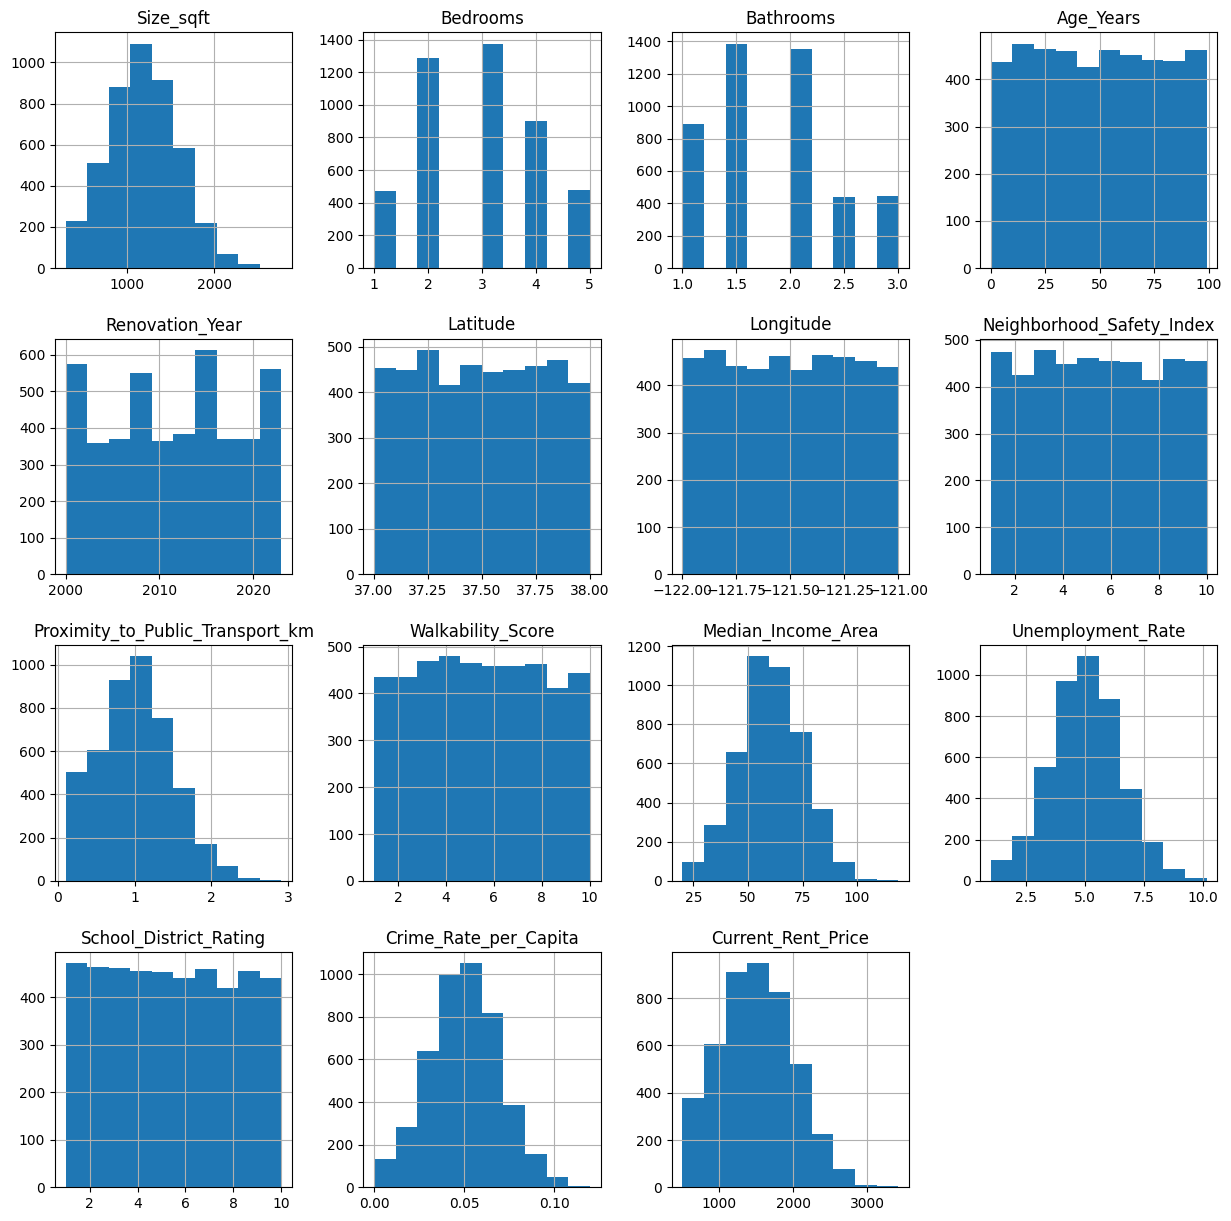

In [25]:
Numerical_value.hist(figsize=(15,15))
plt.show()

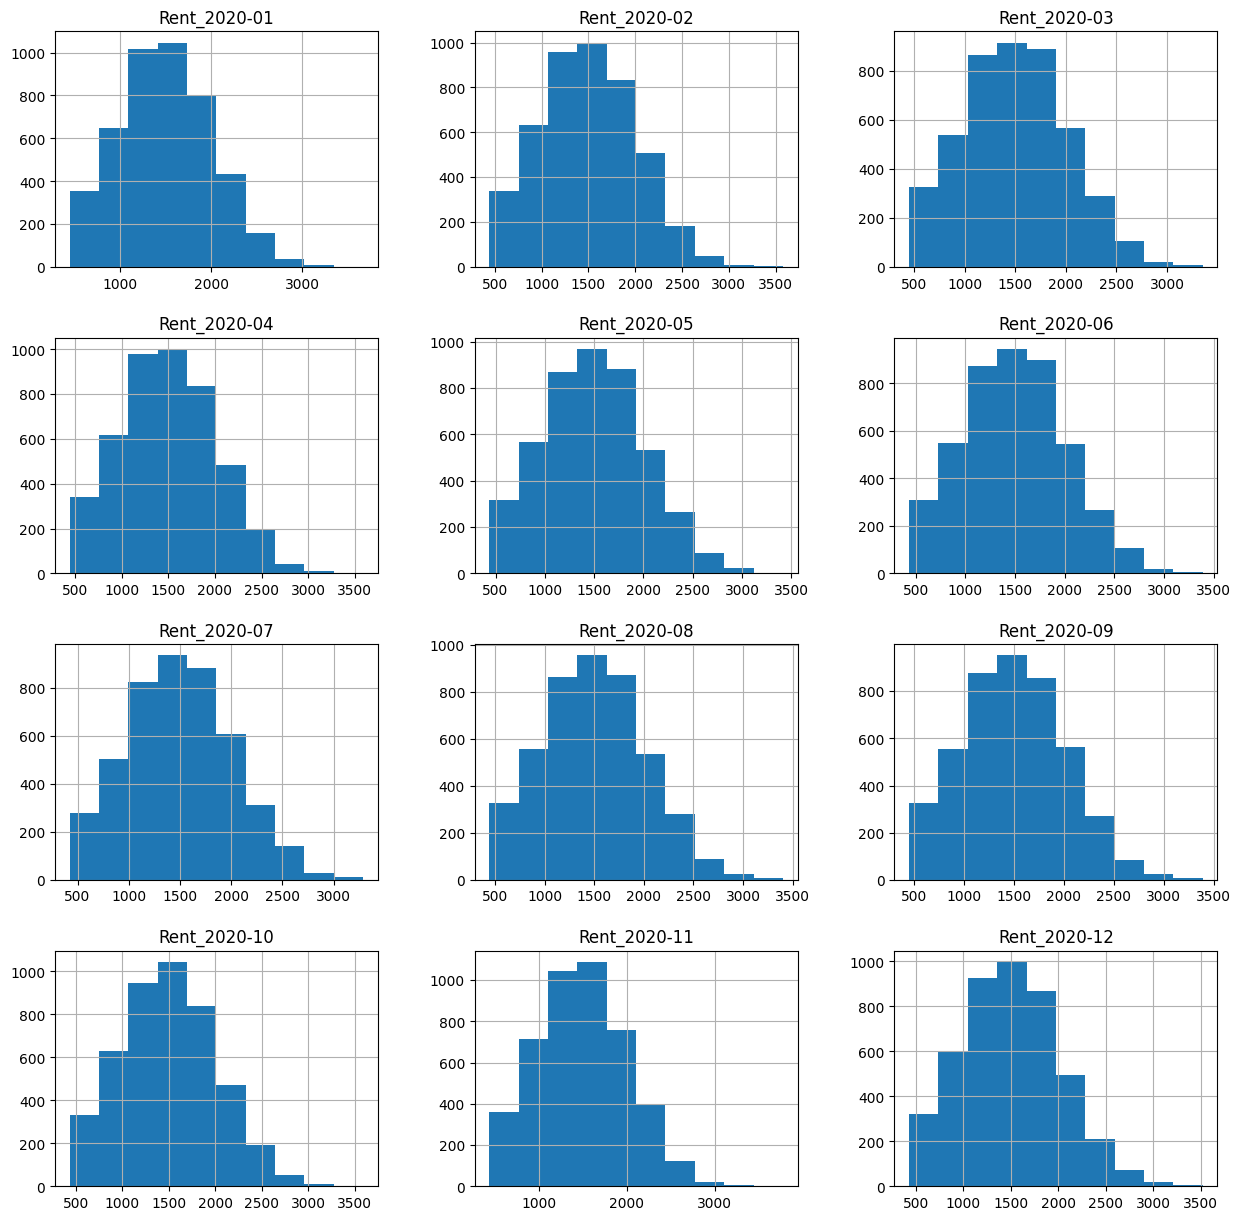

In [26]:
year_2020_rent.hist(figsize=(15,15))
plt.show()

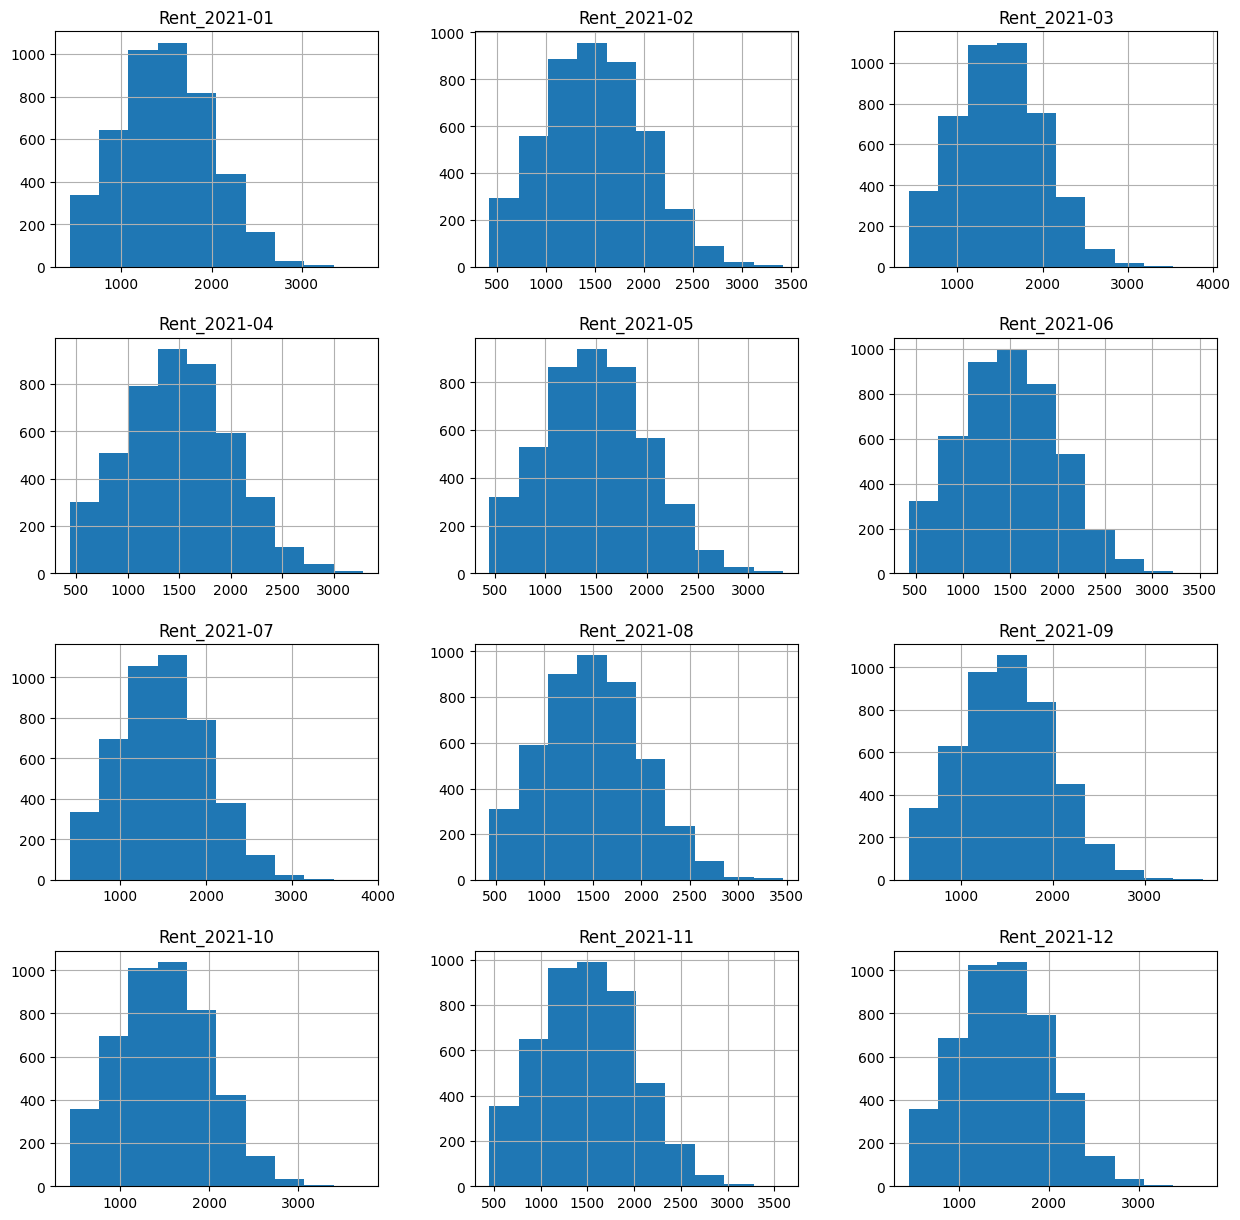

In [27]:
year_2021_rent.hist(figsize=(15,15))
plt.show()

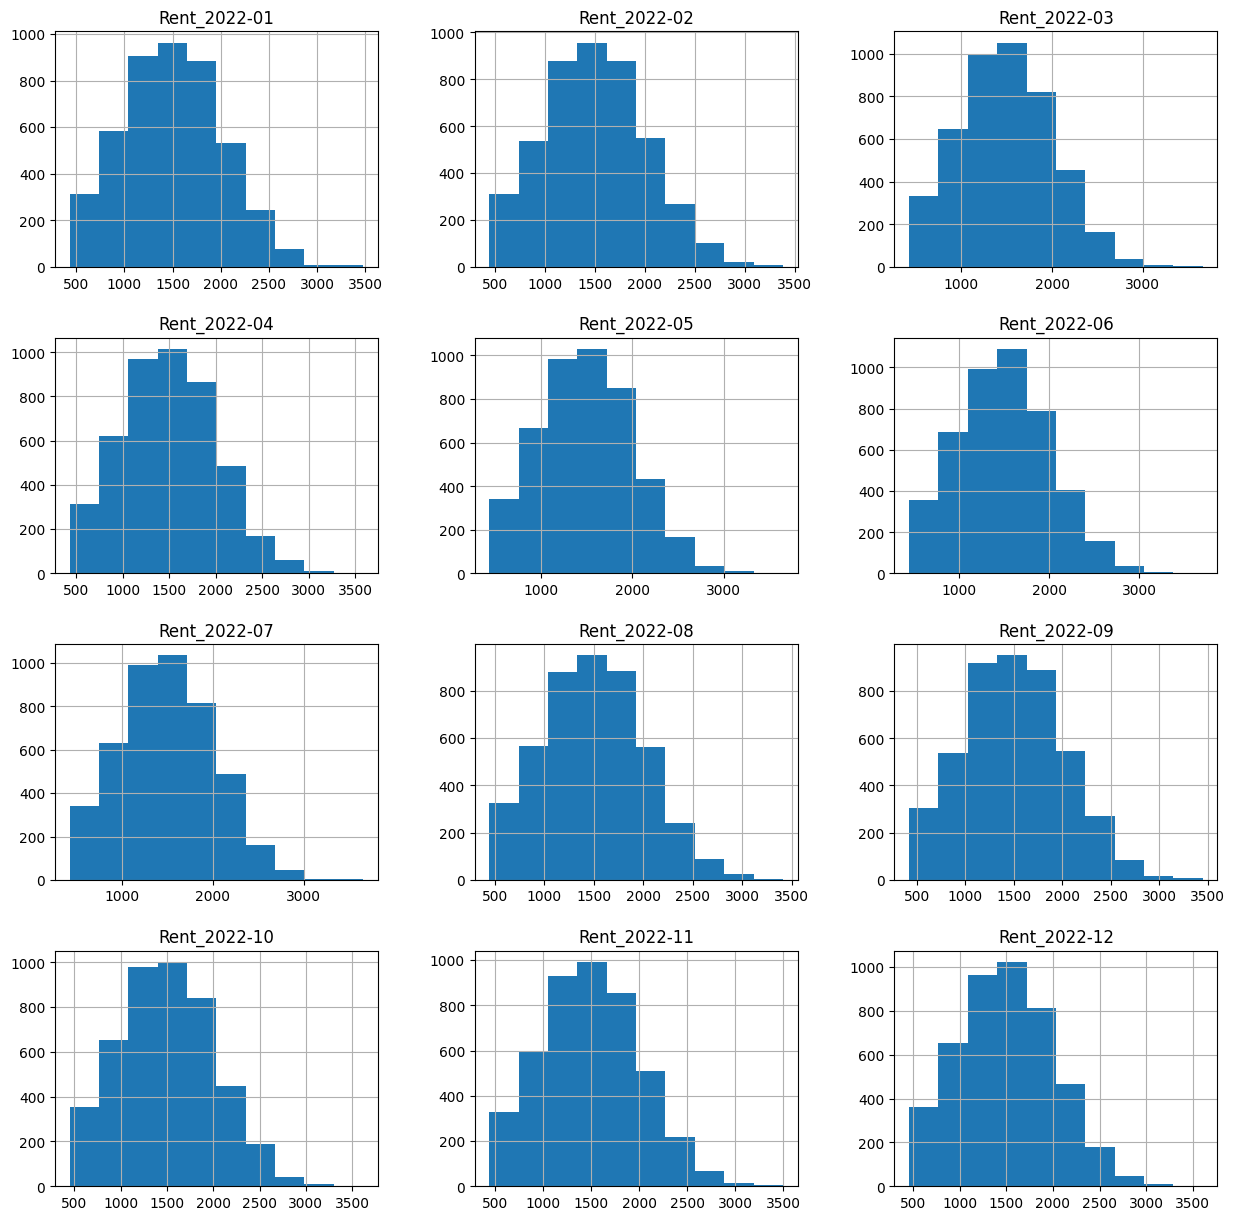

In [28]:
year_2022_rent.hist(figsize=(15,15))
plt.show()

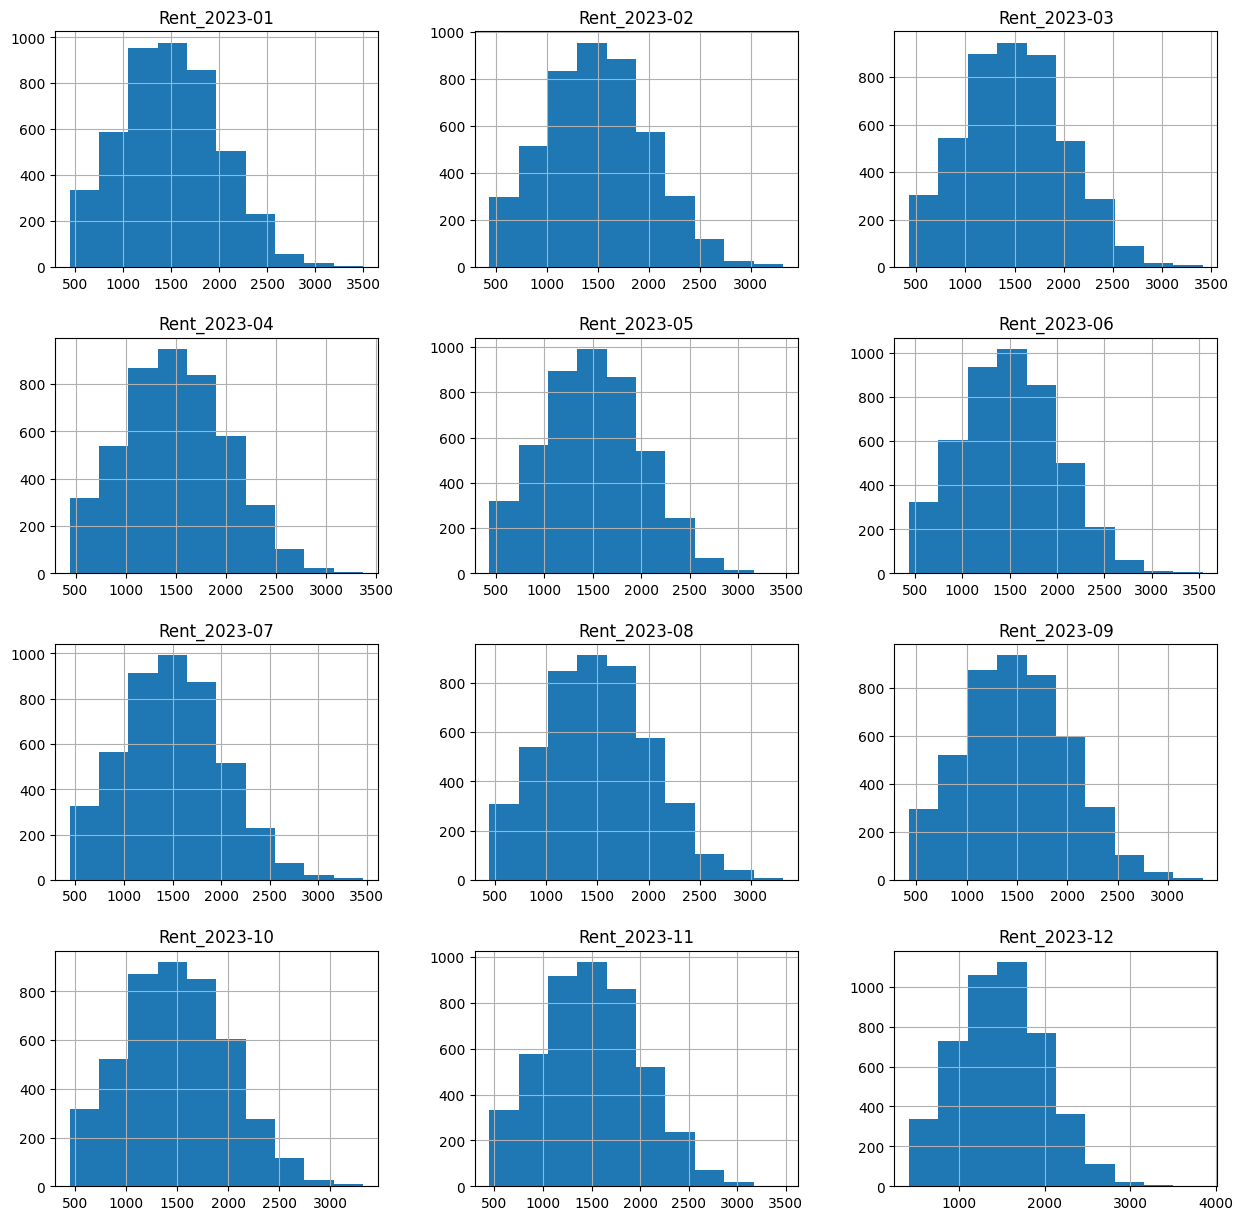

In [29]:
year_2023_rent.hist(figsize=(15,15))
plt.show()

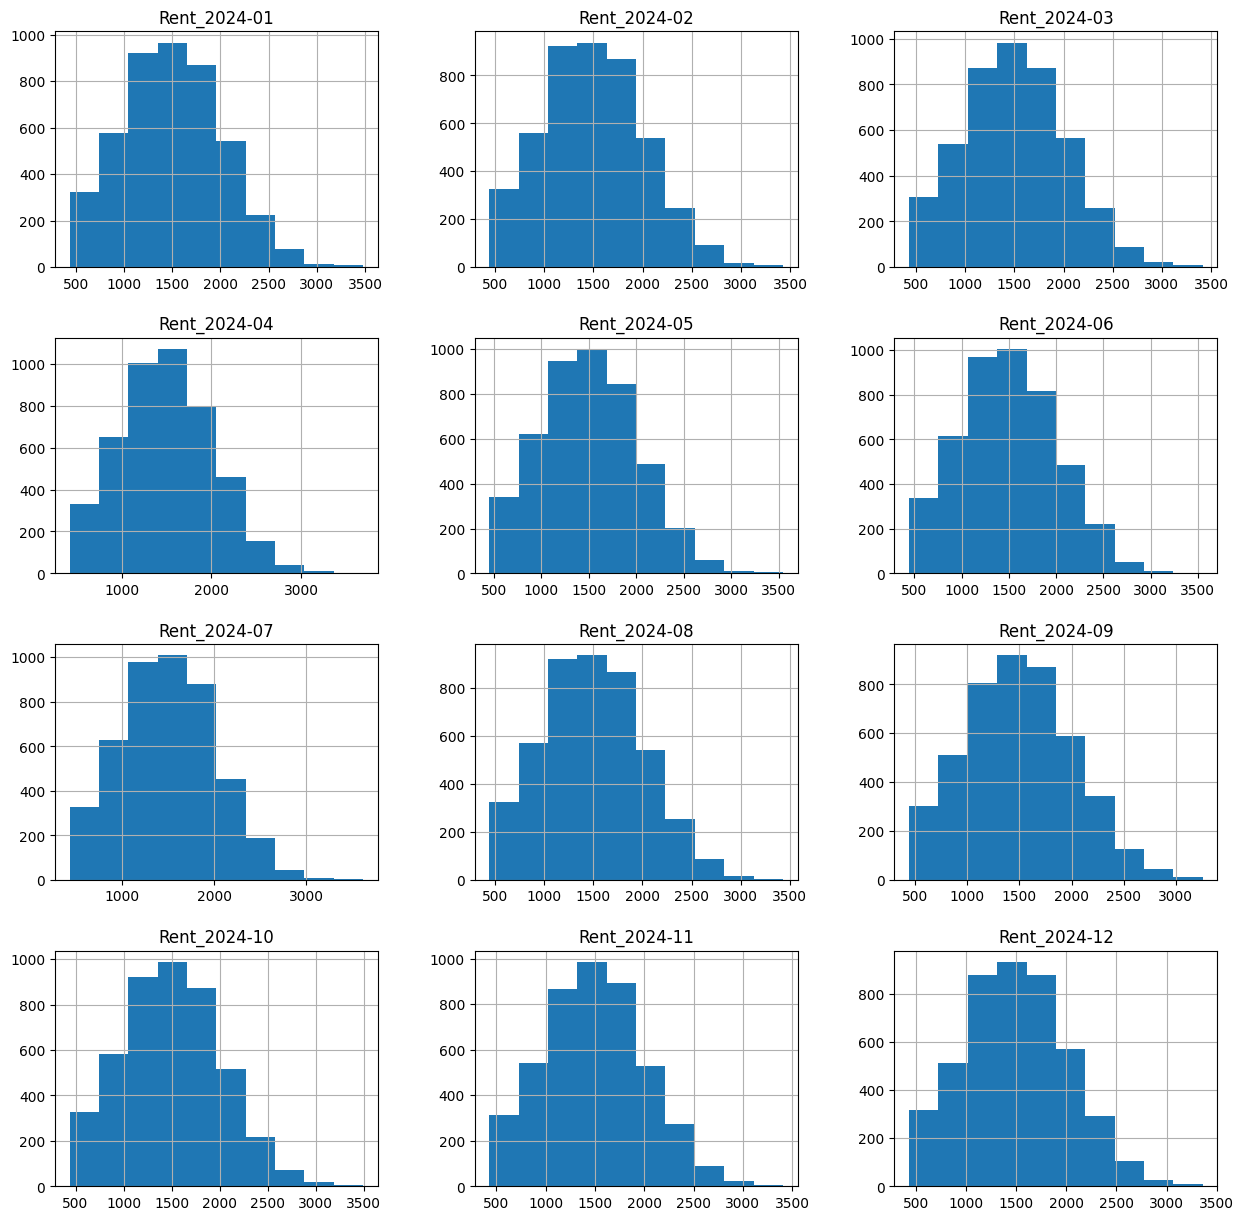

In [30]:
year_2024_rent.hist(figsize=(15,15))
plt.show()

Bar charts for Categorical Values

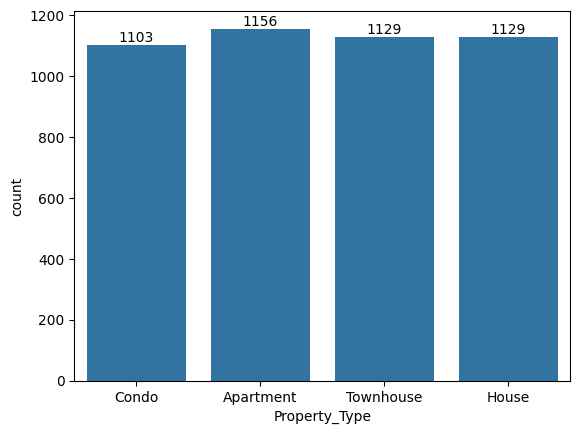

In [31]:
PT=sns.countplot(data=df, x="Property_Type")
PT.bar_label(PT.containers[0])
plt.show()

Above Chart We have Analysed that Apartment in Property_Type is more than the another Property_type

Pie chart for Distribution of Area

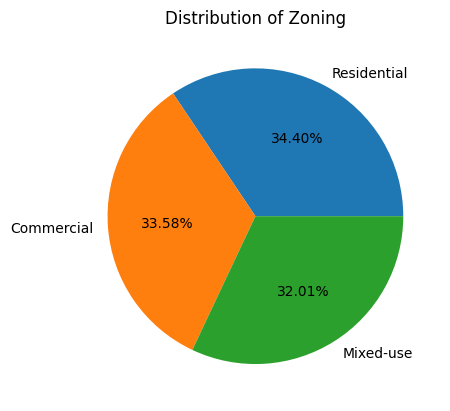

[1554, 1517, 1446]


In [32]:
Residential=df.loc[(df["Zoning"]=="Residential")].count()
Commercial_Zoning=df.loc[(df["Zoning"]=="Commercial")].count()
Mixed_use=df.loc[(df["Zoning"]=="Mixed-use")].count()

l=("Residential","Commercial","Mixed-use")
list=[Residential["Zoning"],Commercial_Zoning["Zoning"],Mixed_use["Zoning"]]

plt.pie(list,labels=l, autopct="%1.2f%%")
plt.title("Distribution of Zoning")
plt.show()
print(list)

Above Chart We have Analysis that Residential Area is greater than others

Scatter plot

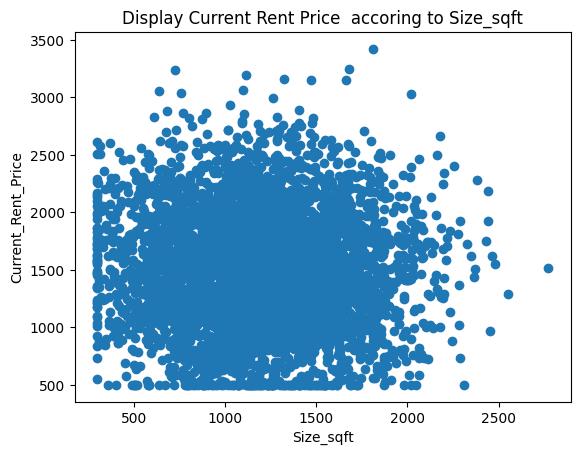

In [33]:
plt.scatter(df["Size_sqft"],df["Current_Rent_Price"])
plt.xlabel("Size_sqft")
plt.ylabel("Current_Rent_Price")
plt.title("Display Current Rent Price  accoring to Size_sqft")
plt.show()

Multipal Regression

Predict Current Rent Price using 2020 Rent Price 

In [34]:
x=year_2020_rent
y=df["Current_Rent_Price"]
empty_brain=LinearRegression()
empty_brain.fit(x,y)

LinearRegression()

In [35]:
Result=empty_brain.predict([[1200,1230,1240,1340,1280,1300,1380.1400,1450,1430.1390,1500,1450,1560]])
print("Current_Rent_Price:",Result)

Current_Rent_Price: [1360.17262764]


c:\Users\INTEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predict Current Rent Price using 2021 Rent Price 

In [36]:
x1=year_2021_rent
y1=df["Current_Rent_Price"]
empty_brain=LinearRegression()
empty_brain.fit(x1,y1)

LinearRegression()

In [37]:
Result=empty_brain.predict([[1200,1230,1240,1340,1280,1300,1380.1400,1450,1430.1390,1500,1450,1560]])
print("Current_Rent_Price:",Result)

Current_Rent_Price: [1361.06300192]


c:\Users\INTEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predict Current Rent Price using 2022 Rent Price 

In [38]:
x2=year_2022_rent
y2=df["Current_Rent_Price"]
empty_brain=LinearRegression()
empty_brain.fit(x2,y2)

LinearRegression()

In [39]:
Result=empty_brain.predict([[1200,1230,1240,1340,1280,1300,1380.1400,1450,1430.1390,1500,1450,1560]])
print("Current_Rent_Price:",Result)

Current_Rent_Price: [1363.80975467]


c:\Users\INTEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predict Current Rent Price using 2023 Rent Price 

In [40]:
x3=year_2023_rent
y3=df["Current_Rent_Price"]
empty_brain=LinearRegression()
empty_brain.fit(x3,y3)

LinearRegression()

In [41]:
Result=empty_brain.predict([[1200,1230,1240,1340,1280,1300,1380.1400,1450,1430.1390,1500,1450,1560]])
print("Current_Rent_Price:",Result)

Current_Rent_Price: [1364.80716224]


c:\Users\INTEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predict Current Rent Price using 2024 Rent Price 

In [42]:
x4=year_2024_rent
y4=df["Current_Rent_Price"]
empty_brain=LinearRegression()
empty_brain.fit(x4,y4)

LinearRegression()

In [43]:
Result=empty_brain.predict([[1200,1230,1240,1340,1280,1300,1380.1400,1450,1430.1390,1500,1450,1560]])
print("Current_Rent_Price:",Result)

Current_Rent_Price: [1363.43478274]


c:\Users\INTEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Conclusion


1. Above Multipal Regression show that  we can find current Rent Prices by using Previous year Rent Price
2. Rent Price are increases as per year increases

Relationship between current rent price, Proximity to Public Transportkm and Neighborhood Safety Index

Feature engineering

In [44]:
df["interaction"]=df["Proximity_to_Public_Transport_km"]*df["Neighborhood_Safety_Index"]

In [45]:
X=df[[ "Proximity_to_Public_Transport_km","Neighborhood_Safety_Index","interaction"]]
y=df["Current_Rent_Price"]


In [46]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [47]:
Result=model.predict([[1,8,10]])
print("Current_Rent_Price:",Result)

Current_Rent_Price: [1499.659332]


c:\Users\INTEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Coefficients

In [48]:
print(model.coef_)

[24.39457734 10.87964719 -5.28852306]


Evaluating Model Sufficiency

Linear Model

In [49]:
X=df.drop("Current_Rent_Price",axis=1)
y=df['Current_Rent_Price']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
model=LinearRegression()
model.fit(X_train,y_train)
Prediction = model.predict(X_test)
mse = mean_squared_error(y_test, Prediction)
print(f'MSE (Linear): {mse:.2f}')

MSE (Linear): 547.94


Linear model  With Interaction Terms

In [50]:
X=df[[ "Proximity_to_Public_Transport_km","Neighborhood_Safety_Index","interaction"]]
y=df["Current_Rent_Price"]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
print(f'MSE (Interaction): {mse:.2f}')

MSE (Interaction): 554.31


Polynomial Regression Model

In [51]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_poly, y_train)
prediction = model.predict(poly_features.transform(X_test))
mse = mean_squared_error(y_test, prediction)
print(f'MSE (Polynomial): {mse:.2f}')

MSE (Polynomial): 570.92
